In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd '/content/drive/My Drive/Colab Notebooks/db'
!ls

/content/drive/My Drive/Colab Notebooks/db
covid_19_data.csv  Meteorite_Landings.csv  test.csv  test.json	test.xlsx
london_merged.csv  poblacion.csv	   test.hdf  test.pkl


In [4]:
df = pd.read_csv('covid_19_data.csv')
df.sample(10)
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

In [5]:
list(df)

['SNo',
 'ObservationDate',
 'Province/State',
 'Country/Region',
 'Last Update',
 'Confirmed',
 'Deaths',
 'Recovered']

In [6]:
df = df[['ObservationDate',
 'Country/Region',
 'Confirmed',
 'Deaths',
 'Recovered']]
df

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.0,0.0,0.0
1,2020-01-22,Mainland China,14.0,0.0,0.0
2,2020-01-22,Mainland China,6.0,0.0,0.0
3,2020-01-22,Mainland China,1.0,0.0,0.0
4,2020-01-22,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
306424,2021-05-29,Ukraine,102641.0,2335.0,95289.0
306425,2021-05-29,Netherlands,29147.0,245.0,0.0
306426,2021-05-29,Mainland China,1364.0,1.0,1324.0
306427,2021-05-29,Ukraine,87550.0,1738.0,83790.0


In [7]:
df_time = df.groupby('ObservationDate').sum()
df_time.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,1097.0,34.0,60.0
2020-01-24,941.0,26.0,39.0
2020-01-25,1437.0,42.0,42.0
2020-01-26,2118.0,56.0,56.0


In [8]:
df1 = df_time['Confirmed'].iloc[10:15]
df1

ObservationDate
2020-02-01    12038.0
2020-02-02    16787.0
2020-02-03    19881.0
2020-02-04    23892.0
2020-02-05    27636.0
Name: Confirmed, dtype: float64

In [9]:
df2 = df_time['Deaths'].iloc[12:17]
df2

ObservationDate
2020-02-03    426.0
2020-02-04    492.0
2020-02-05    564.0
2020-02-06    634.0
2020-02-07    719.0
Name: Deaths, dtype: float64

In [10]:
df1-df2

ObservationDate
2020-02-01        NaN
2020-02-02        NaN
2020-02-03    19455.0
2020-02-04    23400.0
2020-02-05    27072.0
2020-02-06        NaN
2020-02-07        NaN
dtype: float64

In [11]:
df_time.diff().mean()

Confirmed    344728.200811
Deaths         7167.549696
Recovered    217323.811359
dtype: float64

In [12]:
df_diff = df_time.diff()
df_diff


,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,540.0,17.0,30.0
2020-01-24,-156.0,-8.0,-21.0
2020-01-25,496.0,16.0,3.0
2020-01-26,681.0,14.0,14.0
...,...,...,...
2021-05-25,531845.0,12752.0,577063.0
2021-05-26,568216.0,12756.0,555813.0
2021-05-27,554368.0,12753.0,697358.0


In [13]:
df_time.head(1).to_dict()

{'Confirmed': {Timestamp('2020-01-22 00:00:00'): 557.0},
 'Deaths': {Timestamp('2020-01-22 00:00:00'): 17.0},
 'Recovered': {Timestamp('2020-01-22 00:00:00'): 30.0}}

In [14]:
df_diff= df_diff.fillna({'Confirmed':557.0,
 'Deaths': 17.0,
 'Recovered': 30.0})

In [15]:
df_diff

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,540.0,17.0,30.0
2020-01-24,-156.0,-8.0,-21.0
2020-01-25,496.0,16.0,3.0
2020-01-26,681.0,14.0,14.0
...,...,...,...
2021-05-25,531845.0,12752.0,577063.0
2021-05-26,568216.0,12756.0,555813.0
2021-05-27,554368.0,12753.0,697358.0


In [16]:
df_diff.cumsum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,1097.0,34.0,60.0
2020-01-24,941.0,26.0,39.0
2020-01-25,1437.0,42.0,42.0
2020-01-26,2118.0,56.0,56.0
...,...,...,...
2021-05-25,167848207.0,3485788.0,104824935.0
2021-05-26,168416423.0,3498544.0,105380748.0
2021-05-27,168970791.0,3511297.0,106078106.0


In [17]:
df_diff.resample('7D').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,5578.0,131.0,108.0
2020-01-29,18314.0,361.0,749.0
2020-02-05,20911.0,621.0,3827.0
2020-02-12,30335.0,894.0,9668.0
2020-02-19,5277.0,701.0,13553.0
...,...,...,...
2021-04-28,5642661.0,92528.0,4666430.0
2021-05-05,5331241.0,89658.0,4838711.0
2021-05-12,4541037.0,86840.0,4800529.0


In [18]:
df_diff.resample('W-Sun').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-26,2118.0,56.0,56.0
2020-02-02,14669.0,306.0,420.0
2020-02-09,23364.0,544.0,2769.0
2020-02-16,31075.0,864.0,7621.0
2020-02-23,7759.0,699.0,12528.0
...,...,...,...
2021-05-02,5680889.0,93206.0,4734311.0
2021-05-09,5459865.0,90258.0,4759410.0
2021-05-16,4739560.0,86338.0,4692644.0


In [19]:
df_diff.resample('M').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9925.0,213.0,225.0
2020-02-29,76087.0,2728.0,39556.0
2020-03-31,771462.0,39242.0,138226.0
2020-04-30,2401731.0,192394.0,837095.0
2020-05-31,2910561.0,138242.0,1626127.0
2020-06-30,4319842.0,138411.0,2711439.0
2020-07-31,7127806.0,168508.0,5019965.0
2020-08-31,7909780.0,171272.0,6449484.0
2020-09-30,8504867.0,163907.0,6847448.0


In [20]:
df_diff.resample('M').mean()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,992.500000,21.300000,22.500000
2020-02-29,2623.689655,94.068966,1364.000000
2020-03-31,24885.870968,1265.870968,4458.903226
2020-04-30,80057.700000,6413.133333,27903.166667
2020-05-31,93889.064516,4459.419355,52455.709677
2020-06-30,143994.733333,4613.700000,90381.300000
2020-07-31,229929.225806,5435.741935,161934.354839
2020-08-31,255154.193548,5524.903226,208047.870968
2020-09-30,283495.566667,5463.566667,228248.266667


In [21]:
df_cum = df_time.resample('12h').sum(min_count=1)
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,1097.0,34.0,60.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,941.0,26.0,39.0
...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0
2021-05-27 12:00:00,NaN,NaN,NaN
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0


In [22]:
df_cum.bfill()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,1097.0,34.0,60.0
2020-01-23 00:00:00,1097.0,34.0,60.0
2020-01-23 12:00:00,941.0,26.0,39.0
2020-01-24 00:00:00,941.0,26.0,39.0
...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0
2021-05-27 12:00:00,169470725.0,3523117.0,106633069.0
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0


In [23]:
df_cum.ffill()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,557.0,17.0,30.0
2020-01-23 00:00:00,1097.0,34.0,60.0
2020-01-23 12:00:00,1097.0,34.0,60.0
2020-01-24 00:00:00,941.0,26.0,39.0
...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0
2021-05-27 12:00:00,168970791.0,3511297.0,106078106.0
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0


In [24]:
df_cum.fillna(-10000)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,-10000.0,-10000.0,-10000.0
2020-01-23 00:00:00,1097.0,34.0,60.0
2020-01-23 12:00:00,-10000.0,-10000.0,-10000.0
2020-01-24 00:00:00,941.0,26.0,39.0
...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0
2021-05-27 12:00:00,-10000.0,-10000.0,-10000.0
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0


In [25]:
df_cum = df_cum.interpolate()
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,827.0,25.5,45.0
2020-01-23 00:00:00,1097.0,34.0,60.0
2020-01-23 12:00:00,1019.0,30.0,49.5
2020-01-24 00:00:00,941.0,26.0,39.0
...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0
2021-05-27 12:00:00,169220758.0,3517207.0,106355587.5
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0


In [26]:
df_cum['rate'] = 1-df_cum['Deaths']/df_cum['Confirmed']
df_cum

,Confirmed,Deaths,Recovered,rate
ObservationDate,,,,
2020-01-22 00:00:00,557.0,17.0,30.0,0.969479
2020-01-22 12:00:00,827.0,25.5,45.0,0.969166
2020-01-23 00:00:00,1097.0,34.0,60.0,0.969006
2020-01-23 12:00:00,1019.0,30.0,49.5,0.970559
2020-01-24 00:00:00,941.0,26.0,39.0,0.972370
...,...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0,0.979220
2021-05-27 12:00:00,169220758.0,3517207.0,106355587.5,0.979215
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0,0.979211


In [27]:
df_cum = df_cum.reset_index()
df_cum

,ObservationDate,Confirmed,Deaths,Recovered,rate
0,2020-01-22 00:00:00,557.0,17.0,30.0,0.969479
1,2020-01-22 12:00:00,827.0,25.5,45.0,0.969166
2,2020-01-23 00:00:00,1097.0,34.0,60.0,0.969006
3,2020-01-23 12:00:00,1019.0,30.0,49.5,0.970559
4,2020-01-24 00:00:00,941.0,26.0,39.0,0.972370
...,...,...,...,...,...
982,2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0,0.979220
983,2021-05-27 12:00:00,169220758.0,3517207.0,106355587.5,0.979215
984,2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0,0.979211
985,2021-05-28 12:00:00,169711142.5,3528368.0,106886869.0,0.979210


In [28]:
df_cum.groupby(pd.Grouper(key='ObservationDate', freq = 'M'))[['rate']].mean()

,rate
ObservationDate,
2020-01-31,0.974241
2020-02-29,0.973562
2020-03-31,0.960046
2020-04-30,0.935326
2020-05-31,0.933192
2020-06-30,0.945718
2020-07-31,0.957081
2020-08-31,0.964339
2020-09-30,0.968524


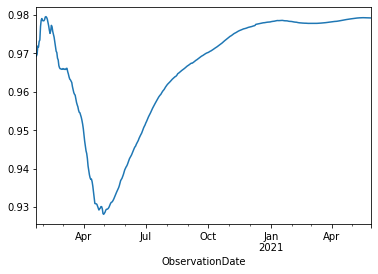

In [29]:
sr = df_cum.groupby(pd.Grouper(key='ObservationDate', freq = '1D'))['rate'].mean()
sr.plot()

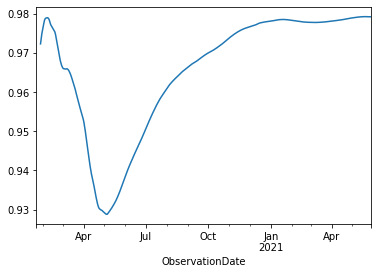

In [30]:
sr.rolling(window=7).mean().plot()

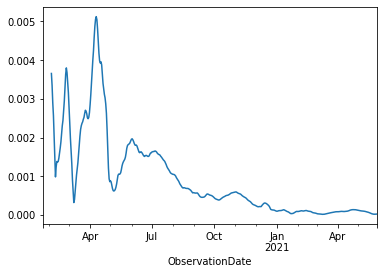

In [31]:
sr.rolling(window=14).apply(lambda x: np.std(x)).plot()

In [47]:
df.groupby(['Country/Region'])['Confirmed'].max().sort_values(ascending=False)

Country/Region
France                   5863138.0
India                    5713215.0
Turkey                   5235978.0
UK                       3910803.0
US                       3788713.0
                           ...    
Micronesia                     1.0
North Ireland                  1.0
Republic of the Congo          1.0
 Azerbaijan                    1.0
China                          0.0
Name: Confirmed, Length: 229, dtype: float64

In [50]:
df_time = df.groupby(['Country/Region', pd.Grouper(key='ObservationDate', freq='1D')]).sum()
df_time

Confirmed  Deaths  Recovered
Country/Region                 ObservationDate                              
 Azerbaijan                    2020-02-28             1.0     0.0        0.0
('St. Martin',)                2020-03-10             2.0     0.0        0.0
Afghanistan                    2020-02-24             1.0     0.0        0.0
                               2020-02-25             1.0     0.0        0.0
                               2020-02-26             1.0     0.0        0.0
...                                                   ...     ...        ...
occupied Palestinian territory 2020-03-12             0.0     0.0        0.0
                               2020-03-14             0.0     0.0        0.0
                               2020-03-15             0.0     0.0        0.0
                               2020-03-16             0.0     0.0        0.0
                               2020-03-17             0.0     0.0        0.0

[87281 rows x 3 columns]

In [52]:
df_france = df_time.loc['France', :]
df_france

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-24,2.0,0.0,0.0
2020-01-25,3.0,0.0,0.0
2020-01-26,3.0,0.0,0.0
2020-01-27,3.0,0.0,0.0
2020-01-28,4.0,0.0,0.0
...,...,...,...
2021-05-25,5670486.0,109040.0,386798.0
2021-05-26,5683143.0,109185.0,388128.0
2021-05-27,5697076.0,109327.0,389105.0


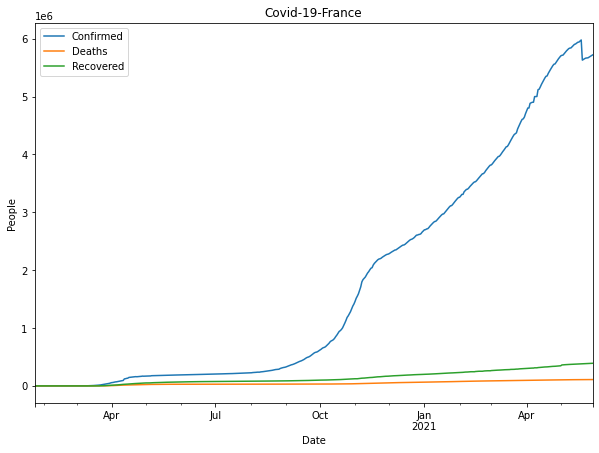

In [56]:
df_france.plot(figsize = (10,7), title = 'Covid-19-France')
plt.xlabel('Date')
plt.ylabel('People')
plt.show()

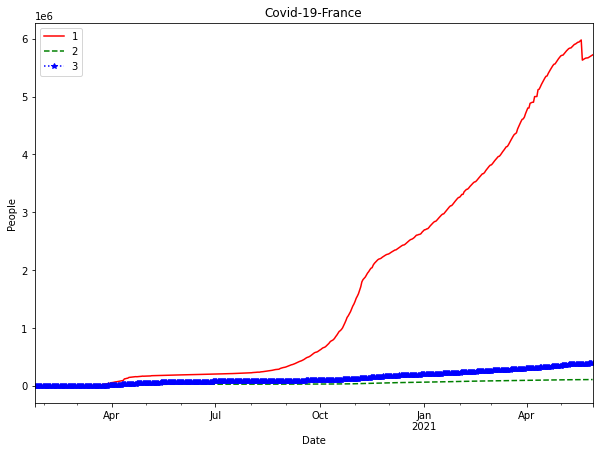

In [59]:
ax = df_france.plot(figsize = (10,7), title = 'Covid-19-France',
                    legend = False,
                    style= ['r-', 'g--', 'b:*'])
ax.legend(['1', '2', '3'])
plt.xlabel('Date')
plt.ylabel('People')
plt.show()

In [61]:
df_monthly = df_france.resample('M').max()
df_monthly

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,5.0,0.0,0.0
2020-02-29,100.0,2.0,12.0
2020-03-31,52278.0,3526.0,9513.0
2020-04-30,169098.0,24380.0,50380.0
2020-05-31,190975.0,28805.0,68473.0
2020-06-30,204244.0,29846.0,76399.0
2020-07-31,227239.0,30268.0,81764.0
2020-08-31,321160.0,30646.0,86790.0
2020-09-30,605893.0,31978.0,98632.0


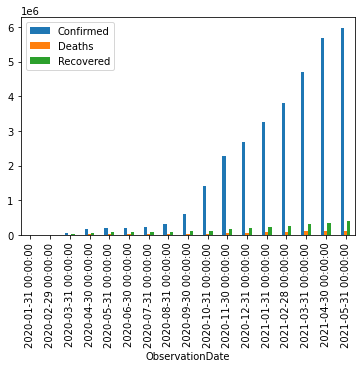

In [62]:
df_monthly.plot(kind='bar')

In [64]:
df_monthly['Treatment'] = df_monthly['Confirmed']- df_monthly['Deaths'] 
df_monthly

,Confirmed,Deaths,Recovered,Treatment
ObservationDate,,,,
2020-01-31,5.0,0.0,0.0,5.0
2020-02-29,100.0,2.0,12.0,98.0
2020-03-31,52278.0,3526.0,9513.0,48752.0
2020-04-30,169098.0,24380.0,50380.0,144718.0
2020-05-31,190975.0,28805.0,68473.0,162170.0
2020-06-30,204244.0,29846.0,76399.0,174398.0
2020-07-31,227239.0,30268.0,81764.0,196971.0
2020-08-31,321160.0,30646.0,86790.0,290514.0
2020-09-30,605893.0,31978.0,98632.0,573915.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4cd4c63fd0>,
      dtype=object)

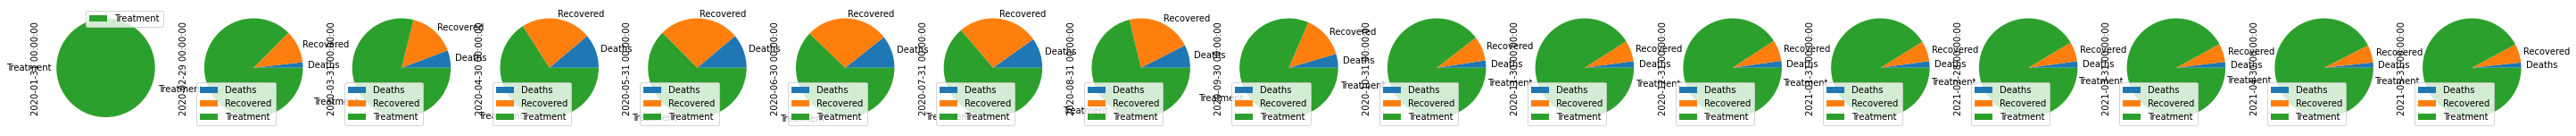

In [67]:
df_monthly[['Deaths', 'Recovered', 'Treatment']].T.plot(figsize = (50,25), kind= 'pie', subplots=True)

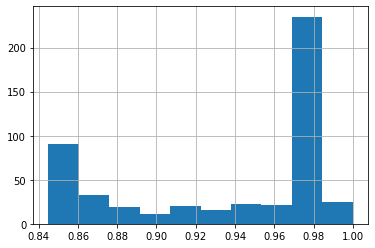

In [69]:
df_france['rate'] = 1- df_france['Deaths']/df_france['Confirmed']
df_france['rate'].hist(bins = 10)

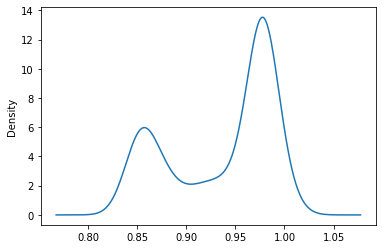

In [70]:
df_france['rate'].plot(kind = 'kde') #distribucion parametrica alrededor del valor de la tasa de supervivencia